In [1]:
# importing important libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# reading data

data = pd.read_sas('DR1IFF_I.XPT')

In [3]:
data = data.dropna()

In [4]:
# finding correlation of all features with CHO

corelation = data[data.columns[1:]].corr()['DR1ICARB'][:]

In [5]:
# finding highly correlated values with CHO

print(corelation[abs(corelation.values) > 0.5])

DR1IKCAL    0.794958
DR1ICARB    1.000000
DR1ISUGR    0.664955
DR1IFIBE    0.569776
DR1IVB1     0.577118
DR1IFOLA    0.541616
DR1IFDFE    0.519071
DR1IMAGN    0.526465
DR1IIRON    0.528656
Name: DR1ICARB, dtype: float64


In [6]:
# creating new df with inportant features

data1 = data[['DR1IKCAL', 'DR1ICARB', 'DR1ISUGR', 'DR1IFIBE', 'DR1_020', 'DR1CCMTX', 'DR1_030Z']].copy()

In [7]:
data1['DR1_020'] = data1['DR1_020']/3600

In [8]:
# creating correlation matrix

cor = data1.corr()

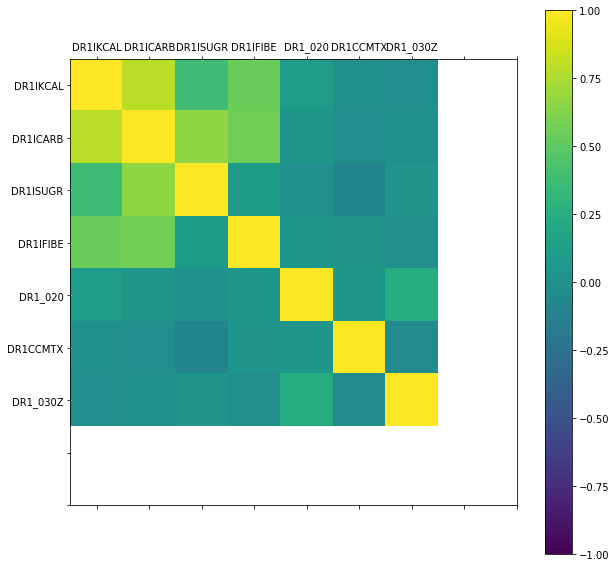

In [9]:
plt.rcParams.update({'figure.figsize': (10,10)})
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cor.index)
ax.set_yticklabels(cor.index)
#ax.figure()
plt.show()

In [10]:
# creating training data

X = data1[['DR1_020', 'DR1IKCAL', 'DR1ISUGR', 'DR1IFIBE', 'DR1_030Z', 'DR1CCMTX']].copy()
y = data1[['DR1ICARB']].copy()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [12]:
lr = LinearRegression().fit(X_train,y_train)
print(lr.score(X_train, y_train)*100)
print(lr.score(X_test, y_test)*100)
y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred)*100)
print(mean_squared_error(y_test, y_pred))

83.84772989545684
84.3880020213138
84.3880020213138
89.22549483021835


In [13]:
y_pred = lr.predict(X_test)

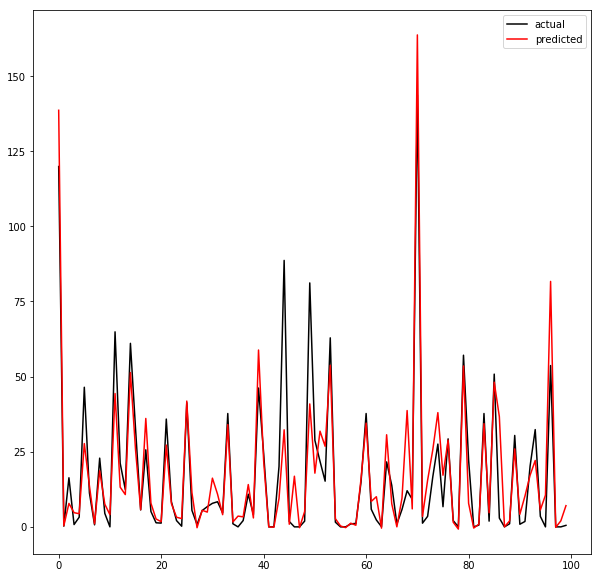

In [14]:
plt.plot(y_test.values[0:100], color="black", label="actual")
plt.plot(y_pred[0:100], color="red", label = "predicted")
plt.legend()

Text(0, 0.5, 'CHO level')

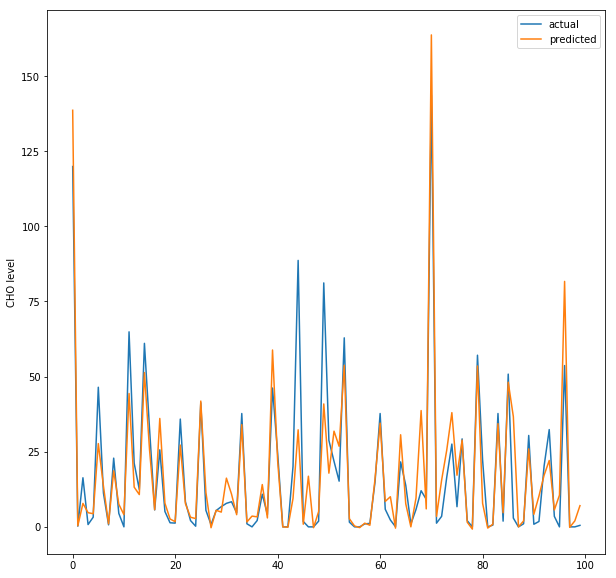

In [15]:
plt.plot(y_test.values[0:100], label="actual")
plt.plot(y_pred[0:100], label = "predicted")
plt.legend()
plt.ylabel('CHO level')

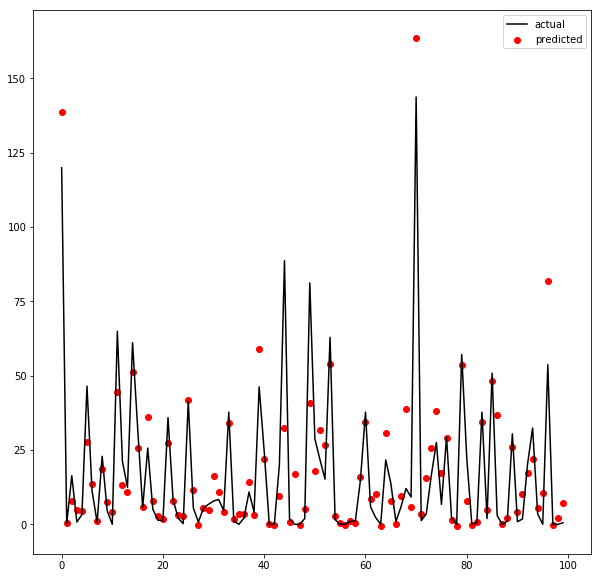

In [16]:
plt.plot(y_test.values[0:100], color="black", label="actual")
plt.scatter(range(0,100), y_pred[0:100], color="red", label = "predicted")
plt.legend()

In [17]:
lr1 = LinearRegression().fit(X,y)
print(lr1.score(X, y)*100)
y_pred = lr1.predict(X)
print(r2_score(y, y_pred)*100)
print(mean_squared_error(y, y_pred))

83.98509236814944
83.98509236814944
90.51849519272675


In [18]:
from sklearn.manifold import TSNE
fashion_tsne = TSNE(random_state=0).fit_transform(data1)

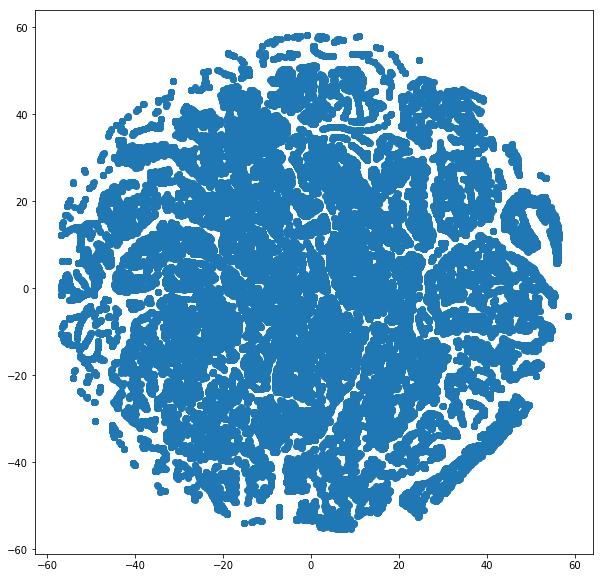

In [19]:
fashion_tsne
plt.scatter(fashion_tsne[:,0], fashion_tsne[:,1])

In [20]:
fashion_tsne

array([[-43.15851  ,  12.007469 ],
       [-37.213863 ,  22.484304 ],
       [-29.080593 ,  17.069132 ],
       ...,
       [  7.5218973, -50.54716  ],
       [ 51.1936   ,   9.978926 ],
       [ 41.18913  , -36.569447 ]], dtype=float32)